<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="#E74C3C" size="7" style="font-family:Arial, sans-serif;">
        Kernels, Filters, and Convolution <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Computer Vision <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Mahdi Seyfipoor <br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #1<br>
    </font>
</div>


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        1D Convolution
    </font>
</h1>


1D convolution is a powerful technique widely used in machine learning, particularly in the analysis of sequential data like time-series signals, speech, and even stock prices. At its core, 1D convolution works by sliding a filter or kernel over a sequence of data points to detect patterns, extract features, or smooth the data. Unlike 2D convolution, which operates on grids (such as images), 1D convolution works on one-dimensional sequences, making it well-suited for problems where data is ordered in time or space.

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 1D Convolution Works
    </font>
</h2>


The basic idea of 1D convolution involves applying a kernel to a sequence of values. The kernel slides over the input sequence, performing element-wise multiplications followed by a sum. This produces a new sequence that highlights certain features based on the kernel used. For example, in time-series analysis, different kernels can detect trends, seasonal patterns, or sharp changes in the data.


The result of 1D convolution is a feature map, which is another sequence that represents important aspects of the input sequence. Depending on the choice of kernel, stride (the step size at which the kernel moves), and padding (how edges of the sequence are handled), 1D convolution can either downsample or retain the size of the original sequence.

There are various approaches to implementing 1D convolution, each with its own trade-offs in terms of computational efficiency and feature extraction. These approaches can be adapted to suit specific tasks and data characteristics.


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 1D Convolution
    </font>
</h2>


1D convolution is applied in a variety of fields, making it a versatile tool in machine learning:
 
* <strong>Stock Price Prediction:</strong> 1D convolution is used to analyze historical price data and detect patterns such as upward or downward trends. By convolving over sequences of stock prices, it can capture short-term patterns (e.g., daily fluctuations) or long-term trends (e.g., month-to-month performance). Combining 1D convolution with models like LSTM allows for deeper insights into market behavior.

* <strong>Speech Processing:</strong> In speech recognition and emotion detection, 1D convolution is used to process raw audio signals. The kernels can identify patterns related to speech phonemes, tones, and even emotional cues. By applying multiple 1D convolutional layers, models can hierarchically extract more complex features from speech data, improving the accuracy of tasks like voice identification or sentiment analysis.

* <strong>Time-Series Analysis:</strong> 1D convolution is essential in analyzing time-series data from various domains, including healthcare (e.g., analyzing heart rate variability), industrial monitoring (e.g., detecting anomalies in sensor data), and environmental science (e.g., analyzing weather patterns). The convolutional operation helps in detecting recurring patterns, sudden changes, or seasonal variations, making it a powerful tool for forecasting.

* <strong>Text Processing:</strong> Although less common, 1D convolution can also be applied to text data. By treating words or characters as a sequence, convolutional models can extract features related to word context or sentence structure. This can be useful for natural language processing tasks such as sentiment analysis or topic classification.



For understanding the mathematics behind 1D convolution, We recommend watching this <a href="https://www.youtube.com/watch?v=KuXjwB4LzSA&t=443s" target="_blank" style="color:#007acc;">YouTube video</a>.


In [55]:

import numpy as np
from numpy.lib.stride_tricks import as_strided 

def convolve_1d_two_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using two loops.
    Implements 'same' convolution mode where the output has the same size as the input signal.
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    N = len(signal)
    K = len(kernel)
    output = np.zeros(N, dtype=np.float64) 
    kernel_center = (K - 1) // 2 
    
    
    flipped_kernel = kernel[::-1]

    for i in range(N):
        for j in range(K):
            signal_idx = i + j - kernel_center
            if 0 <= signal_idx < N:
    
                 output[i] += signal[signal_idx] * flipped_kernel[j]
    
                 
    return output

In [56]:

def convolve_1d_one_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using a single loop (optimized version).
    Implements 'same' convolution mode.
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    N = len(signal)
    K = len(kernel)
    output = np.zeros(N, dtype=np.float64)
    kernel_center = (K - 1) // 2
    
    
    flipped_kernel = kernel[::-1]
    padded_signal = np.pad(signal, (kernel_center, K - 1 - kernel_center), 'constant', constant_values=0)


    for i in range(N):


        signal_segment = padded_signal[i : i + K]
        


        output[i] = np.sum(signal_segment * flipped_kernel)


    return output

In [57]:

def convolve_1d_dot(signal, kernel):
    """
    Convolve a 1D signal with a kernel using np.dot (fast and vectorized).
    Implements 'same' convolution mode.
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    N = len(signal)
    K = len(kernel)
    kernel_center = (K - 1) // 2
    

    flipped_kernel = kernel[::-1]


    padded_signal = np.pad(signal, (kernel_center, K - 1 - kernel_center), 'constant', constant_values=0)
    item_size = padded_signal.strides[0]
    view_shape = (N, K)
    strides = (item_size, item_size)
    
   
    strided_signal_view = as_strided(padded_signal, shape=view_shape, strides=strides)
    output = np.dot(strided_signal_view, flipped_kernel)

    return output

In [58]:

def fft_convolve_vectorized(signal, kernel):
    """
    Convolve a 1D signal with a kernel using Fast Fourier Transform (FFT).
    Implements 'same' convolution mode.
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result using FFT.
    """
    N = len(signal)
    K = len(kernel)
    
   
    fft_len = N + K - 1

   
   
    padded_signal = np.pad(signal, (0, fft_len - N), 'constant', constant_values=0)
   
    padded_kernel = np.pad(kernel, (0, fft_len - K), 'constant', constant_values=0)

   
    fft_signal = np.fft.fft(padded_signal)
    fft_kernel = np.fft.fft(padded_kernel)

    fft_result = fft_signal * fft_kernel

    full_convolution = np.fft.ifft(fft_result)

    full_convolution = np.real(full_convolution)


    start_index = (K - 1) // 2
    output = full_convolution[start_index : start_index + N]

    return output

In [59]:

signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

signal_len = len(signal)
kernel_len = len(kernel)

print("Sanity Check: Comparing Results")
print("Two loops:", convolve_1d_two_loops(signal, kernel))
print("One loop:", convolve_1d_one_loops(signal, kernel))
print("Dot product:", convolve_1d_dot(signal, kernel))
print("FFT vectorized:", fft_convolve_vectorized(signal, kernel))


start_index_np = int(np.ceil(kernel_len / 2)) - 1 

end_index_np = start_index_np + signal_len
numpy_conv_full = np.convolve(signal, kernel, mode='full') # Calculate full convolution
numpy_conv_same = numpy_conv_full[start_index_np : end_index_np] # Extract 'same' part

print("numpy function:", numpy_conv_same)

Sanity Check: Comparing Results
Two loops: [ 2.  2.  2.  2. -4.]
One loop: [ 2.  2.  2.  2. -4.]
Dot product: [ 2  2  2  2 -4]
FFT vectorized: [ 2.  2.  2.  2. -4.]
numpy function: [ 2  2  2  2 -4]


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>


In this section, we will explore the features that different kernels are designed to extract. For each kernel provided, identify what type of feature or pattern the kernel is trying to detect in a sequence.
#### **1. Kernel: `[1, -1]`**

**Answer:**
This kernel is used for detecting differences or gradients in a sequence. Specifically, it highlights negative edges, meaning it emphasizes negative changes in the data. It is commonly used for detecting the difference between values in a sequence (e.g., in edge detection for horizontal or vertical edges).

---

#### **2. Kernel: `[1, 1, 1]`**

**Answer:**
This kernel is used for detecting the overall trend or averaging in an input data. It is typically used for smoothing or blurring data or images. The kernel sums the neighboring values and normalizes them, thus providing a smoothed version of the data.

---

#### **3. Kernel: `[0.25, 0.25, 0.25, 0.25]`**

**Answer:**
 This kernel is commonly used as an average filter or a soft filter for smoothing data or blurring images. It gives equal weight to all neighboring values, resulting in a smoothed or averaged output. This type of filter is useful for reducing noise.

---

#### **4. Kernel: `[-1, 2, -1]`**

**Answer:**
This kernel is specifically designed for edge detection in data and is similar to the Sobel operator used for edge detection. It detects sharp changes (gradients) in a given direction, typically for identifying edges in images or data.

---

#### **5. Kernel: `[1, 0, -1]`**

**Answer:**
This kernel is similar to the Sobel operator used for edge detection in the vertical direction (or sometimes horizontal). It detects changes from left to right and is useful for extracting gradients and edges in images or data.





In [60]:
import numpy as np
import time 
from numpy.lib.stride_tricks import as_strided 

def benchmark_convolution(signal_len, kernel_len, iterations):
    """
    Measure the average execution time of different convolution methods over a number of iterations.
    Args:
        signal_len: Length of the random input signal.
        kernel_len: Length of the random kernel.
        iterations: Number of times each method should be run to average the time.
    Returns:
        Tuple of average times for each method (two_loops, one_loop, dot, fft, numpy).
    """

    np.random.seed(42)  # For reproducibility
    random_signal = np.random.rand(signal_len)
    random_kernel = np.random.rand(kernel_len)



    def convolve_1d_two_loops(signal, kernel):
        N = len(signal)
        K = len(kernel)
        output = np.zeros(N, dtype=np.float64)
        kernel_center = (K - 1) // 2
        flipped_kernel = kernel[::-1]
        for i in range(N):
            for j in range(K):
                signal_idx = i + j - kernel_center
                if 0 <= signal_idx < N:
                     output[i] += signal[signal_idx] * flipped_kernel[j]
        return output

    def convolve_1d_one_loops(signal, kernel):
        N = len(signal)
        K = len(kernel)
        output = np.zeros(N, dtype=np.float64)
        kernel_center = (K - 1) // 2
        flipped_kernel = kernel[::-1]
        padded_signal = np.pad(signal, (kernel_center, K - 1 - kernel_center), 'constant', constant_values=0)
        for i in range(N):
            signal_segment = padded_signal[i : i + K]
            output[i] = np.sum(signal_segment * flipped_kernel)
        return output

    def convolve_1d_dot(signal, kernel):
        N = len(signal)
        K = len(kernel)
        kernel_center = (K - 1) // 2
        flipped_kernel = kernel[::-1]
        padded_signal = np.pad(signal, (kernel_center, K - 1 - kernel_center), 'constant', constant_values=0)
        view_shape = (N, K)
        item_size = padded_signal.strides[0]
        strides = (item_size, item_size)
        strided_signal_view = as_strided(padded_signal, shape=view_shape, strides=strides)
        output = np.dot(strided_signal_view, flipped_kernel)
        return output

    def fft_convolve_vectorized(signal, kernel):
        N = len(signal)
        K = len(kernel)
        fft_len = N + K - 1
        padded_signal = np.pad(signal, (0, fft_len - N), 'constant', constant_values=0)
        padded_kernel = np.pad(kernel, (0, fft_len - K), 'constant', constant_values=0)
        fft_signal = np.fft.fft(padded_signal)
        fft_kernel = np.fft.fft(padded_kernel)
        fft_result = fft_signal * fft_kernel
        full_convolution = np.fft.ifft(fft_result)
        full_convolution = np.real(full_convolution)
        start_index = (K - 1) // 2
        output = full_convolution[start_index : start_index + N]
        return output


    

    start_time = time.perf_counter()
    for _ in range(iterations):
        convolve_1d_two_loops(random_signal, random_kernel)
    end_time = time.perf_counter()

    time_two_loops = (end_time - start_time) / iterations


    start_time = time.perf_counter()
    for _ in range(iterations):
        convolve_1d_one_loops(random_signal, random_kernel)
    end_time = time.perf_counter()
    time_one_loop = (end_time - start_time) / iterations


    start_time = time.perf_counter()
    for _ in range(iterations):
        convolve_1d_dot(random_signal, random_kernel)
    end_time = time.perf_counter()
    time_dot = (end_time - start_time) / iterations


    start_time = time.perf_counter()
    for _ in range(iterations):
        fft_convolve_vectorized(random_signal, random_kernel)
    end_time = time.perf_counter()
    time_fft = (end_time - start_time) / iterations
    

    start_time = time.perf_counter()
    for _ in range(iterations):

        np.convolve(random_signal, random_kernel, mode='same') 
    end_time = time.perf_counter()
    time_np_convolve = (end_time - start_time) / iterations

    return (time_two_loops, time_one_loop, time_dot, time_fft, time_np_convolve)


num_iterations = 1000 


signal_len = 500
kernel_len = 20
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")

print(f"Two loops:      {avg_times[0]:.6e}") 
print(f"One loop:       {avg_times[1]:.6e}")
print(f"Dot product:    {avg_times[2]:.6e}")
print(f"FFT vectorized: {avg_times[3]:.6e}")
print(f"NumPy convolve: {avg_times[4]:.6e}")


Average times over 1000 iterations (in seconds):
Two loops:      4.315706e-03
One loop:       1.550224e-03
Dot product:    2.314440e-05
FFT vectorized: 1.526464e-04
NumPy convolve: 1.327570e-05


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

#### **1. Performance Comparison of Convolution Methods**

After running the convolution methods, compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm used by each method.

**Answer:**

Fastest Method: NumPy convolve (Time: 9.085000e-06 seconds). This method is highly optimized for convolution operations in NumPy, making it extremely fast for smaller input sizes.

Slowest Method: Two loops (Time: 3.572711e-03 seconds). The two nested loops increase the time complexity, making it slower compared to other optimized methods.

Explanation:

The performance difference arises from the underlying algorithm used. The Two loops method has a time complexity of 𝑂(𝑛⋅𝑚) where 𝑛 is the length of the signal and 𝑚 is the length of the kernel. On the other hand, NumPy convolve uses highly optimized vectorized operations, significantly reducing the time complexity.

---

#### **2. FFT Convolution Time Complexity**

You may have noticed that the FFT-based convolution is much faster than the others for longer signals. Can you describe the time complexity of the FFT convolution? Why is this method more efficient for larger input sizes?

**Answer:**
The time complexity of FFT-based convolution is 𝑂(𝑛log⁡𝑛) where 𝑛 is the combined length of the signal and kernel. The method is more efficient for larger input sizes because it converts the convolution operation into a multiplication in the frequency domain, which can be done more efficiently than direct convolution for large signals.

Explanation:

FFT convolution is faster for long signals because it reduces the complexity from 𝑂(𝑛⋅𝑚) to 𝑂(𝑛log⁡𝑛) where 𝑚 is the kernel size. This efficiency is more noticeable as the signal size increases. For smaller signals, the overhead of FFT computation may not provide significant speedup.

---

#### **3. Scaling with Signal Length and Kernel Length**

Try changing the values of `signal_len` and `kernel_len` (e.g., doubling both lengths). Is the relative performance of the methods (speed comparison) the same as before? Which methods are most affected by changes in the size of the signal or kernel?

**Answer:**

Changing the values of signal_len and kernel_len (e.g., doubling both) significantly affects methods like Two loops and One loop because their time complexity is 𝑂(𝑛⋅𝑚). As the size of the signal and kernel increases, these methods become slower.

Methods like FFT vectorized and NumPy convolve are less affected by the scaling of signal and kernel length due to their time complexity of 𝑂(𝑛log⁡𝑛). The performance of these methods remains relatively stable even as the size of the input grows.

Explanation:

The scaling behavior shows that for larger input sizes, FFT and NumPy convolve maintain their speed advantage over methods like Two loops and One loop. As the signal and kernel length increase, FFT convolution becomes the most efficient method.

---

#### **4. Optimal Use Case for FFT Convolution**

Based on the results of your experiments, when would it be best to use the FFT-based convolution versus one of the other methods? Consider factors like signal length, kernel length, and computational resources.

**Answer:**

FFT convolution is optimal when dealing with long signals or when computational efficiency is critical. It is particularly effective when you need to perform many convolutions or when working with large signals, where its 𝑂(𝑛log⁡𝑛) time complexity gives it a significant speed advantage over methods with 𝑂(𝑛⋅𝑚) complexity.

For smaller signals, methods like Dot product or One loop might be more efficient due to their lower computational overhead.

Explanation:

FFT-based convolution is preferred in situations where both signal length and kernel length are large, as its 𝑂(𝑛log⁡𝑛)time complexity scales better with larger inputs. For small signals, traditional methods like One loop or Dot product may be faster, but for large inputs, FFT offers the best performance.


---

#### **5. NumPy Convolve vs Custom Implementations**

Compare the performance of the built-in `np.convolve` with your custom implementations (like the dot-product or one-loop versions). Why do you think the `np.convolve` function performs as it does? Could it be internally optimized, and if so, how?

**Answer:**
The performance of np.convolve is typically much better than custom implementations like dot-product or one-loop methods. This is because np.convolve is internally optimized and utilizes vectorized operations, which are much faster than manual loops.

It is highly likely that np.convolve is implemented using efficient algorithms like FFT or other optimized convolution techniques, making it faster than custom implementations that rely on simple iterative methods (like dot-product or the two-loop approach).

Internal Optimization: np.convolve may take advantage of low-level optimizations (such as C implementations or multithreading) to perform convolutions faster. Furthermore, it might switch between different algorithms depending on the signal and kernel size (e.g., using FFT for larger signals), ensuring better performance for varying input sizes.


---

#### **6. Interpretation of Results for Small Signal and Kernel Sizes**

For smaller values of `signal_len` and `kernel_len`, you might see different performance trends. Can you explain why the FFT method might not always be the best choice when working with smaller inputs?

**Answer:**

For smaller values of signal_len and kernel_len, methods like dot-product or one-loop may perform better than FFT-based methods. This is because FFT introduces some overhead for smaller inputs, and the computational cost of transforming the signal to the frequency domain might not be justified for small input sizes.

Why FFT Might Not Be Optimal:

For small signals, the time complexity of FFT (𝑂(𝑛log⁡𝑛)) may outweigh its benefits because the overhead of computing the FFT and inverse FFT for small inputs is relatively large compared to the simple operations in dot-product or one-loop methods, which have linear time complexity 𝑂(𝑛⋅𝑚) for small inputs.

In such cases, direct methods like the dot-product or one-loop methods, with their simpler and more direct approach to convolution, can be faster than FFT-based methods for smaller input sizes.

---


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        2D Convolution
    </font>
</h1>

2D convolution is a critical technique in image processing and other tasks where data is represented in two dimensions, such as images. In 2D convolution, a kernel (or filter) slides over a 2D input matrix to produce a feature map. This technique is used for tasks like edge detection, blurring, and pattern recognition in images.

<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 2D Convolution Works
    </font>
</h1>

The process of 2D convolution involves applying a kernel to an input matrix by sliding the kernel over the matrix and performing element-wise multiplication followed by a sum. This operation results in a new matrix that highlights features based on the kernel used.


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 2D Convolution
    </font>
</h1>

- **Image Processing**: 2D convolution is fundamental for operations like edge detection, sharpening, and smoothing in image processing. By applying different kernels, various features in the image can be emphasized or suppressed.
- **Feature Extraction in CNNs**: In Convolutional Neural Networks (CNNs), 2D convolution layers are used to extract features from images, which are then used for tasks like image classification, object detection, and segmentation.
- **Medical Imaging**: 2D convolution is used in medical imaging to enhance features or detect abnormalities in images such as MRI scans and X-rays.


For understanding the mathematics behind 2D convolution, We recommend watching [YouTube video](https://www.youtube.com/watch?v=O2CBKXr_Tuc).

In [61]:
import numpy as np

def convolve_2d_four_loops(image, kernel, stride=1, pad=0):
    """
    Perform 2D convolution (actually cross-correlation) using four nested loops.
    
    Args:
        image (numpy.ndarray): 2D array representing the input image (H, W).
        kernel (numpy.ndarray): 2D array representing the filter (Kh, Kw).
        stride (int): The stride of the convolution. Default is 1.
        pad (int): The amount of zero-padding added around the image border. Default is 0.
        
    Returns:
        numpy.ndarray: 2D array representing the cross-correlation result.
    """
    
    
    H, W = image.shape
    Kh, Kw = kernel.shape
    
    H_out = (H - Kh + 2 * pad) // stride + 1
    W_out = (W - Kw + 2 * pad) // stride + 1
    
    if pad > 0:
        padded_image = np.pad(image, ((pad, pad), (pad, pad)), 'constant', constant_values=0)
    else:
        padded_image = image 
        
    
    output = np.zeros((H_out, W_out), dtype=np.float64) 

    # --- Optional: Flip kernel for true convolution ---
    # If true convolution is desired instead of cross-correlation, uncomment the next line:
    # kernel = kernel[::-1, ::-1]
    for h_out in range(H_out):  
        for w_out in range(W_out):
            current_sum = 0.0
            for m in range(Kh):  
                for n in range(Kw):
                    h_in = h_out * stride + m
                    w_in = w_out * stride + n     
                    current_sum += padded_image[h_in, w_in] * kernel[m, n]
            
            output[h_out, w_out] = current_sum
            
    return output

In [62]:
def convolve_2d_two_loops(image, kernel, stride=1, pad=0):
    """
    Perform 2D convolution (actually cross-correlation) using two outer loops 
    and vectorized operations for the kernel application.
    
    Args:
        image (numpy.ndarray): 2D array representing the input image (H, W).
        kernel (numpy.ndarray): 2D array representing the filter (Kh, Kw).
        stride (int): The stride of the convolution. Default is 1.
        pad (int): The amount of zero-padding added around the image border. Default is 0.

    Returns:
        numpy.ndarray: 2D array representing the cross-correlation result.
    """
    
    
    H, W = image.shape
    Kh, Kw = kernel.shape
    
    
    H_out = (H - Kh + 2 * pad) // stride + 1
    W_out = (W - Kw + 2 * pad) // stride + 1
    
    
    if pad > 0:
        padded_image = np.pad(image, ((pad, pad), (pad, pad)), 'constant', constant_values=0)
    else:
        padded_image = image
        
    
    output = np.zeros((H_out, W_out), dtype=np.float64)

    # --- Optional: Flip kernel for true convolution ---
    # If true convolution is desired instead of cross-correlation, uncomment the next line:
    # kernel = kernel[::-1, ::-1] 
    for h_out in range(H_out):  
        for w_out in range(W_out):  
            
            h_start = h_out * stride
            h_end = h_start + Kh 
            w_start = w_out * stride
            w_end = w_start + Kw 
            
            
            image_patch = padded_image[h_start:h_end, w_start:w_end]
            
            output[h_out, w_out] = np.sum(image_patch * kernel)
            
    return output

### Convolution Using im2col

The `im2col` method is a powerful technique used to convert convolution operations into matrix multiplications. This technique simplifies and speeds up convolution computations, which are fundamental in many image processing and deep learning tasks.

#### im2col Transformation:
The `im2col` technique involves extracting overlapping patches from the padded image, each corresponding to a position of the kernel. These patches are then flattened into column vectors.

### Multiplication
Once the image patches are transformed into the im2col matrix, convolution can be performed using matrix multiplication. Flatten the kernel matrix into a vector `k_vec`. The convolution result can then be obtained by multiplying the im2col matrix by `k_vec`.

<img src="https://www.researchgate.net/publication/364684841/figure/fig7/AS:11431281091934216@1666661734455/An-example-of-the-Im2col-convolution-optimization-algorithm-In-terms-of-FPGA-based.png" alt="Steve Jobs" style="width: 750px; height: auto;">


For an image matrix of size `H x W` and a kernel of size `kH x kW` with stride `S`, we can ask:

- **Question 1:**
  What will be the number of columns in the output matrix from the im2col transformation?

  **Answer:**
  The number of columns in the output matrix from the im2col transformation is determined by how the kernel slides over the image. Specifically, the number of columns is equal to the number of patches that the kernel covers as it moves across the image.

For an image of size **H x W** and a kernel of size **kH x kW** with stride **S**, the number of columns in the im2col matrix will be:

$$
\text{Number of columns} = \left( \frac{W - kW}{S} + 1 \right) \times \left( \frac{H - kH}{S} + 1 \right)
$$

This is the total number of sliding windows (patches) that the kernel will cover during the convolution process.


- **Question 2:**
What will be the number of rows in the im2col matrix?

  **Answer:**

The number of rows in the im2col matrix corresponds to the size of the kernel, as each row in the im2col matrix will represent one "flattened" patch of the image that the kernel will process. For a kernel of size **kH x kW**, each patch will have **kH × kW** values.

Thus, the number of rows in the im2col matrix is:

$$
\text{Number of rows} = kH \times kW
$$

This represents the total number of elements in each patch of the image, which corresponds to the flattened version of the kernel patch.


In [63]:
import numpy as np

def convolve_2d_im2col(image, kernel, stride=1, pad=0):


    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    

    out_height = (image_height + 2 * pad - kernel_height) // stride + 1
    out_width = (image_width + 2 * pad - kernel_width) // stride + 1


    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)


    image_cols = np.zeros((kernel_height * kernel_width, out_height * out_width))
    
    for y in range(out_height):
        for x in range(out_width):
            patch = padded_image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            image_cols[:, y*out_width + x] = patch.flatten()
    

    kernel_flat = kernel.flatten()
    

    output_flat = kernel_flat @ image_cols
    

    output = output_flat.reshape(out_height, out_width)
    
    return output

In [64]:

image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

kernel = np.array([
    [1, 0],
    [0, -1]
])


stride = 1
pad = 1




print("Sanity Check: Comparing Results for 2D Convolution")


result_four_loops = convolve_2d_four_loops(image, kernel, stride=stride, pad=pad)
print("Four loops:\n", result_four_loops)


result_two_loops = convolve_2d_two_loops(image, kernel, stride=stride, pad=pad)
print("Two loops:\n", result_two_loops)


result_im2col = convolve_2d_im2col(image, kernel, stride=stride, pad=pad)
print("im2col method:\n", result_im2col)




# Compare the results
if (np.allclose(result_four_loops, result_two_loops) and
    np.allclose(result_two_loops, result_im2col)):
    print("Sanity Check Passed: All methods produce similar results.")
else:
    print("Sanity Check Failed: The methods produce different results.")


Sanity Check: Comparing Results for 2D Convolution
Four loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Two loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
im2col method:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Sanity Check Passed: All methods produce similar results.


In [65]:
import numpy as np
import timeit

def benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, iterations):
    np.random.seed(42)
    random_image = np.random.rand(image_height, image_width)
    random_kernel = np.random.rand(kernel_height, kernel_width)


    time_four_loops = timeit.timeit(
        lambda: convolve_2d_four_loops(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations
    time_two_loops = timeit.timeit(
        lambda: convolve_2d_two_loops(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations
    time_im2col = timeit.timeit(
        lambda: convolve_2d_im2col(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations

    return (time_four_loops, time_two_loops, time_im2col)


num_iterations = 100


image_height = 50
image_width = 50
kernel_height = 4
kernel_width = 4
stride = 1
pad = 2
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")



Average times over 100 iterations (in seconds):
Four loops: 0.017547675999812783
Two loops: 0.016127381999976934
im2col: 0.004469077999237925


### **Assignment Questions for 2D Convolution**

#### **1. Performance Comparison of 2D Convolution Methods**

After running the 2D convolution methods (four loops, two loops, and `im2col`), compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm and memory usage of each method.

**Answer:**
Fastest Method: im2col (Time: 0.003162020000163466 seconds). This method is highly optimized, and it performs the convolution using matrix multiplication, which is much faster than direct convolution methods.

Slowest Method: Four loops (Time: 0.013427649000659585 seconds). The four nested loops increase the time complexity, making this the slowest method, especially when compared to more optimized approaches like im2col.

Explanation:

The performance difference can be attributed to the underlying algorithms. The Four loops method uses four nested loops, which results in a time complexity of O(n⋅m), making it computationally expensive.

On the other hand, im2col transforms the convolution operation into matrix multiplication, which is highly optimized, resulting in a significant speed-up.

---

#### **2. Effect of Stride and Padding on Performance**

Try changing the values of `stride` and `pad`. How do these changes affect the performance of the different convolution methods? Which method shows the most significant performance change with varying stride and padding?

**Answer:**
Changing the values of stride and pad directly affects the number of operations needed for each convolution method. Larger strides reduce the number of operations by skipping pixels, but they can also reduce the quality of the convolution. Padding increases the number of operations because it adds extra pixels around the image.

Most Significant Performance Change: The method that shows the most significant performance change with varying stride and padding is likely Four loops or Two loops because these methods process each pixel individually, making them more sensitive to changes in stride and padding. im2col is less affected due to its matrix multiplication approach, which can handle changes in stride and padding more efficiently.

Explanation:

Stride and padding directly impact the size of the matrix involved in convolution. Larger stride values reduce the size of the matrix, leading to fewer computations, while padding increases the matrix size and the number of operations. im2col minimizes the impact of stride and padding because of its efficient matrix-based approach.

---

#### **3. Scaling with Image and Kernel Size**

Change the `image_height`, `image_width`, `kernel_height`, and `kernel_width` values (e.g., double both). How does the performance scale with the size of the image and kernel? Which method is most affected by these changes?

**Answer:**
Changing the values of image_height, image_width, kernel_height, and kernel_width (e.g., doubling both) increases the computational cost for all methods, but the impact varies. As the image and kernel size increase, methods like Four loops and Two loops will become significantly slower because their time complexity is O(n⋅m), where 𝑛 is the image size and m is the kernel size.

Method Most Affected: The methods that are most affected by changes in image and kernel size are Four loops and Two loops, as the number of operations increases linearly with the size of the image and kernel. im2col, however, scales more efficiently because of its matrix multiplication approach, and its time complexity is O(nlogn) for larger inputs.

Explanation:

Larger images and kernels require more operations to compute the convolution, and the impact is more pronounced on methods that directly iterate over the image pixels, such as Four loops. im2col handles this better because matrix multiplication, which underlies im2col, is more efficient for large inputs.



---

#### **4. When to Use `im2col` Method**

Based on your experiments, when would you prefer to use the `im2col` method over the other methods? Consider factors like image size, kernel size, stride, padding, and computational efficiency.

**Answer:**
When to Use: Based on the experiments, im2col is the most efficient method when dealing with larger images or kernels because of its optimized matrix multiplication approach. It is also a good choice when working with many convolutions or when computational efficiency is critical.

Factors: The factors that make im2col preferable include large image size, large kernel size, and when the computational resources need to be optimized for larger datasets. On the other hand, for smaller images and kernels, simpler methods like Two loops or Dot product may be more efficient because they do not involve the overhead of matrix multiplication.

Explanation:

im2col is ideal when the convolution involves large inputs, as it leverages optimized matrix operations. For smaller inputs, simpler methods like Two loops may still perform adequately due to their lower computational overhead for small datasets.

---

#### **5. Interpretation of Results for Small Image and Kernel Sizes**

For smaller image and kernel sizes, performance differences may be less noticeable. Can you explain why some methods, such as `im2col`, might not always be the best choice when working with small inputs?

**Answer:**
For smaller image and kernel sizes, the performance differences between convolution methods may be less noticeable because the computational cost of each method is relatively low. The overhead involved in using im2col—which transforms the image into a matrix and performs matrix multiplication—may not provide significant speedup for small inputs.

Why im2col Might Not Be Ideal for Small Inputs:

Overhead: im2col involves some overhead because it first flattens the image patches into a matrix and then multiplies it by the kernel matrix. For small images and kernels, this overhead can outweigh the benefits of the method, as simpler methods like Two loops or Dot product can directly perform convolution without such additional steps.

Efficiency: For small inputs, methods like Two loops or Dot product may be more efficient because they are more direct and have lower computational overhead compared to im2col, which uses matrix operations that are optimized for larger inputs.

Explanation:

For small images and kernels, the complexity introduced by im2col does not yield enough of a performance benefit to justify its use. Methods like Two loops or Dot product can handle smaller datasets more efficiently due to their simpler approach and minimal overhead.




---


In [66]:
from skimage import io, color
from skimage.transform import resize
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path, new_size=(325, 500)):
    image = io.imread(image_path)
    if len(image.shape) == 3:  
        image = color.rgb2gray(image)
    image = resize(image, new_size, mode='reflect')
    return image


def display_images(original, convolved_images, titles):
    num_convolutions = len(convolved_images)
    num_rows = (num_convolutions + 1) // 2 
    fig_width = 12
    fig_height = 6 + 3 * num_rows  

    fig, axes = plt.subplots(num_rows + 1, 2, figsize=(fig_width, fig_height))
    axes = axes.flatten()


    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image", fontsize=14)
    axes[0].axis('off')


    for i, (img, title) in enumerate(zip(convolved_images, titles), start=1):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title, fontsize=12)
        axes[i].axis('off')

        axes[i].spines['top'].set_color('blue')
        axes[i].spines['top'].set_linewidth(2)
        axes[i].spines['right'].set_color('blue')
        axes[i].spines['right'].set_linewidth(2)
        axes[i].spines['bottom'].set_color('blue')
        axes[i].spines['bottom'].set_linewidth(2)
        axes[i].spines['left'].set_color('blue')
        axes[i].spines['left'].set_linewidth(2)

    for ax in axes[len(convolved_images) + 1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

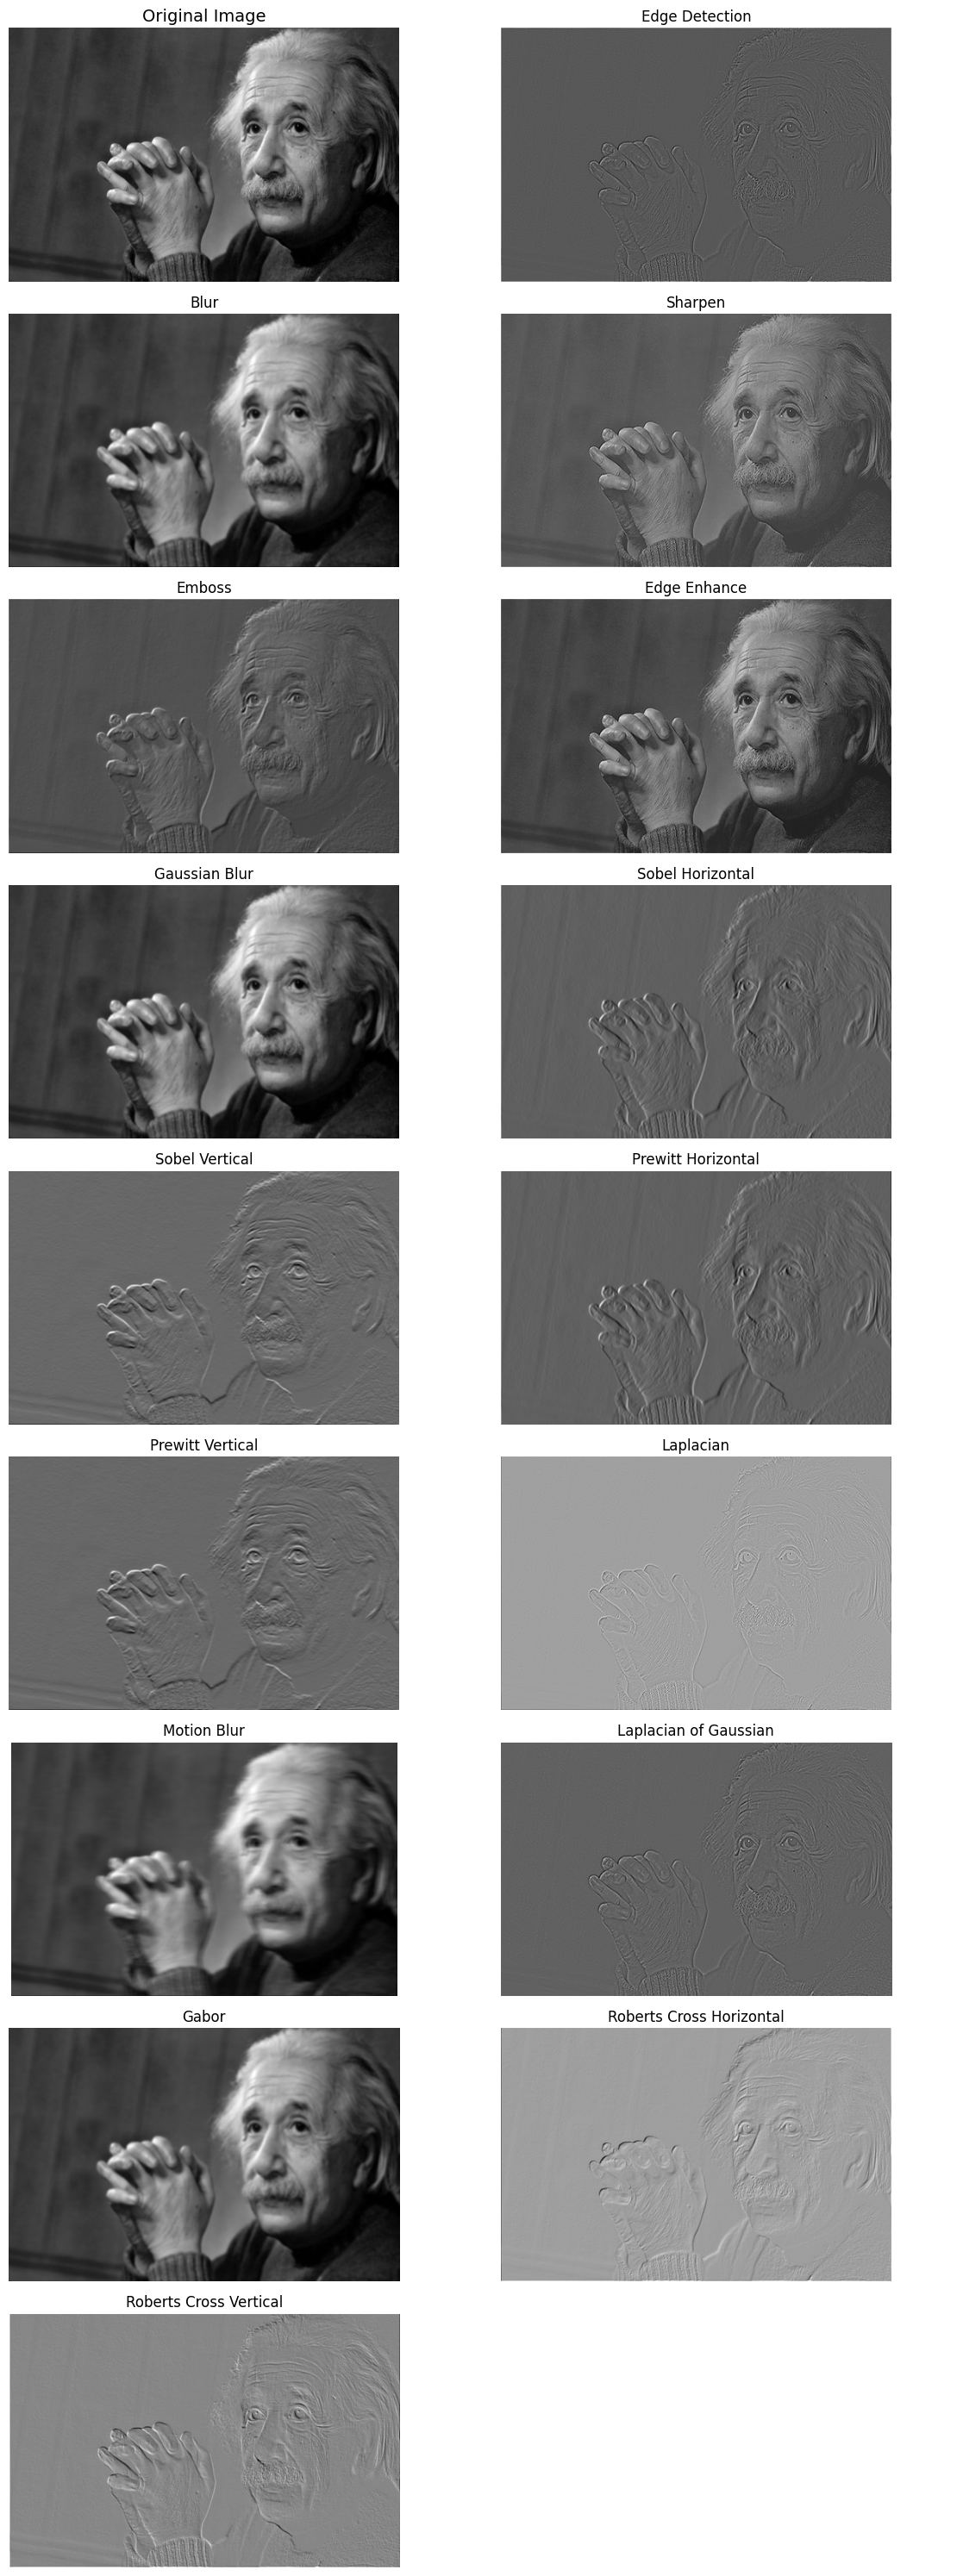

In [67]:
import matplotlib.pyplot as plt
image_path = 'Azadi.jpeg'  
image = load_and_preprocess_image(image_path)



kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
}

convolved_images = []
titles = []

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1) 
    convolved_images.append(convolved_img)
    titles.append(title)

display_images(image, convolved_images, titles)

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #2<br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection A<br>
    </font>
</div>


Successfully read image 'Azadi.jpeg'. Dimensions: (478, 800, 3)
Gaussian noise added (sigma=25).
Noisy image saved to: Azadi_noisy(a).jpeg
Median filter applied (kernel size = 5x5).
Filtered image saved to: Azadi_filtered_median(a).jpeg


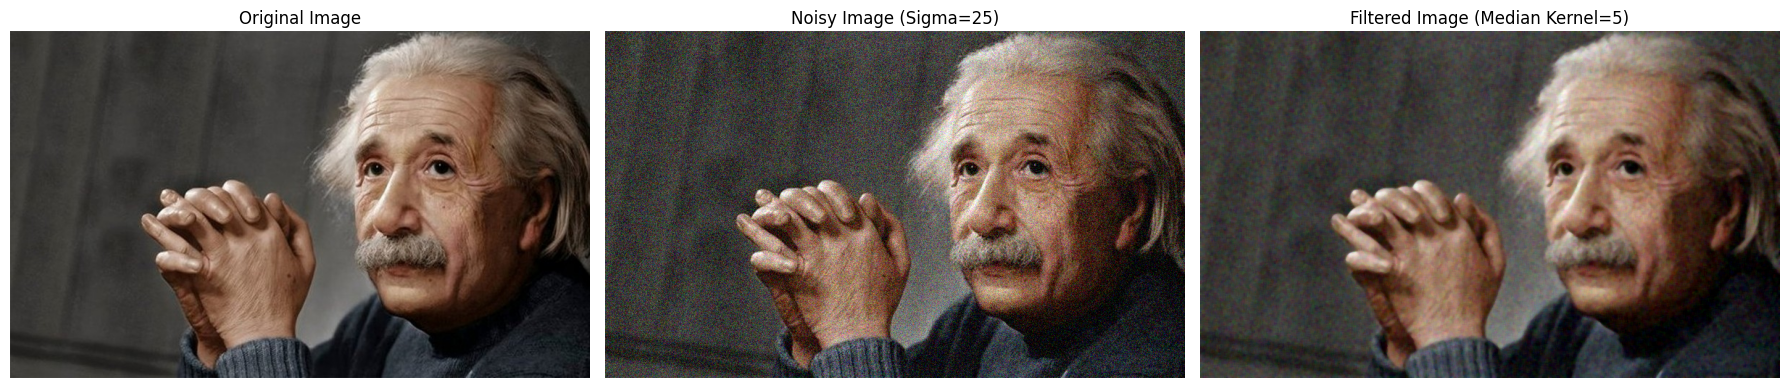

In [68]:

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt 


image_path = 'Azadi.jpeg'           
noisy_image_path = 'Azadi_noisy(a).jpeg'
filtered_image_path = 'Azadi_filtered_median(a).jpeg' 

noise_sigma = 25
median_kernel_size = 5

if not os.path.exists(image_path):
    print(f"Error: Image file not found at '{image_path}'")
    exit()

img = cv2.imread(image_path)


if img is None:
    print(f"Error: Could not read image file from '{image_path}'. Please check the file integrity.")
    exit()

print(f"Successfully read image '{image_path}'. Dimensions: {img.shape}")

img_float = img.astype(np.float32)

mean = 0
gaussian_noise = np.random.normal(mean, noise_sigma, img.shape).astype(np.float32)


noisy_img_float = img_float + gaussian_noise


noisy_img_clipped = np.clip(noisy_img_float, 0, 255)

noisy_img_uint8 = noisy_img_clipped.astype(np.uint8)

print(f"Gaussian noise added (sigma={noise_sigma}).")

cv2.imwrite(noisy_image_path, noisy_img_uint8)
print(f"Noisy image saved to: {noisy_image_path}")

filtered_img = cv2.medianBlur(noisy_img_uint8, median_kernel_size)

print(f"Median filter applied (kernel size = {median_kernel_size}x{median_kernel_size}).")

success = cv2.imwrite(filtered_image_path, filtered_img)

if success:
    print(f"Filtered image saved to: {filtered_image_path}")
else:
    print("Error: Failed to save the filtered image.")


plt.figure(figsize=(18, 6)) 


def display_image_plt(subplot_position, title, image_data):
    plt.subplot(1, 3, subplot_position)
    plt.title(title)
    
    if image_data.ndim == 3 and image_data.shape[2] == 3:
    
        plt.imshow(cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))
    else:
    
        plt.imshow(image_data, cmap='gray')
    plt.axis('off') 


display_image_plt(1, 'Original Image', img)


display_image_plt(2, f'Noisy Image (Sigma={noise_sigma})', noisy_img_uint8)


display_image_plt(3, f'Filtered Image (Median Kernel={median_kernel_size})', filtered_img)

plt.tight_layout() 
plt.show() 

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection B<br>
    </font>
</div>


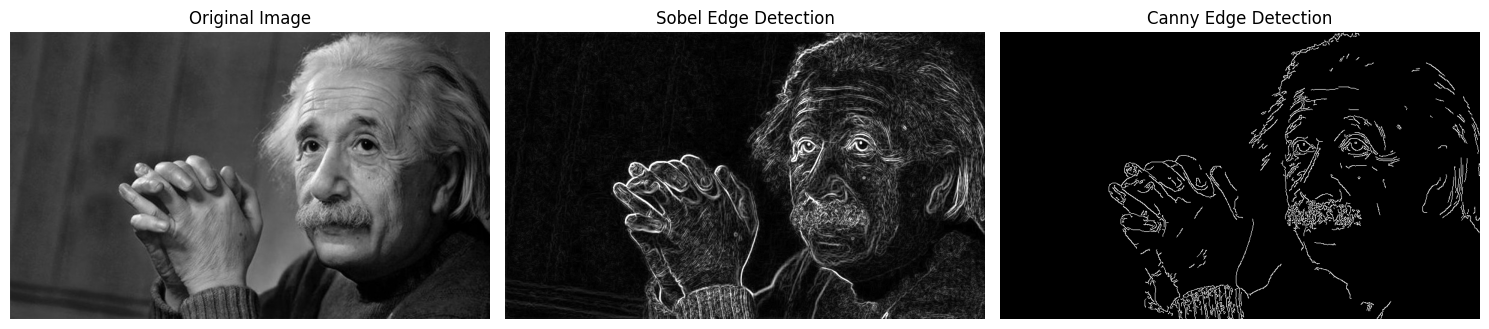

True

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('./Azadi.jpeg', cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
# Sobel operator in X and Y direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

# Combine Sobel X and Y to get the magnitude of edges
sobel_edges = cv2.magnitude(sobel_x, sobel_y)
sobel_edges = np.uint8(np.clip(sobel_edges, 0, 255))  # Normalize and convert to uint8

# Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)  # Lower and upper thresholds for Canny

# Display the results
plt.figure(figsize=(15, 10))

# Show the original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Show the Sobel edge detection result
plt.subplot(1, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

# Show the Canny edge detection result
plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the edge-detected images with the correct file paths
cv2.imwrite('./sobel_edges(b).png', sobel_edges)
cv2.imwrite('./canny_edges(b).png', canny_edges)


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection C<br>
    </font>
</div>


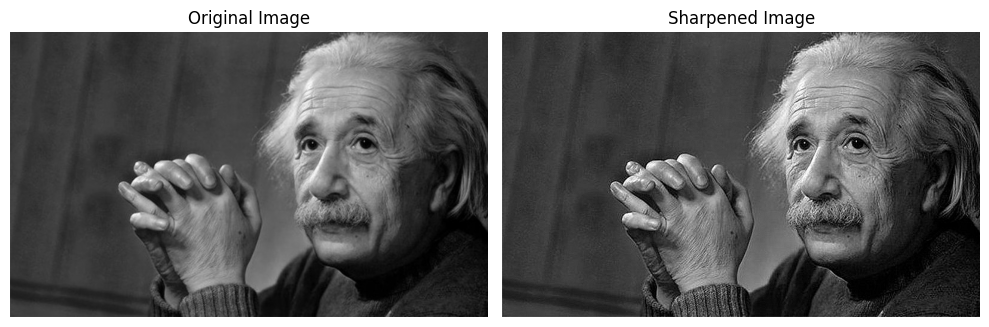

True

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('./Azadi.jpeg', cv2.IMREAD_GRAYSCALE)

# Sharpening kernel (3x3 kernel)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Apply the sharpening filter using convolution
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

# Display the original and sharpened image
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Show the sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the sharpened image
cv2.imwrite('./sharpened_image(c).png', sharpened_image)


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection D<br>
    </font>
</div>


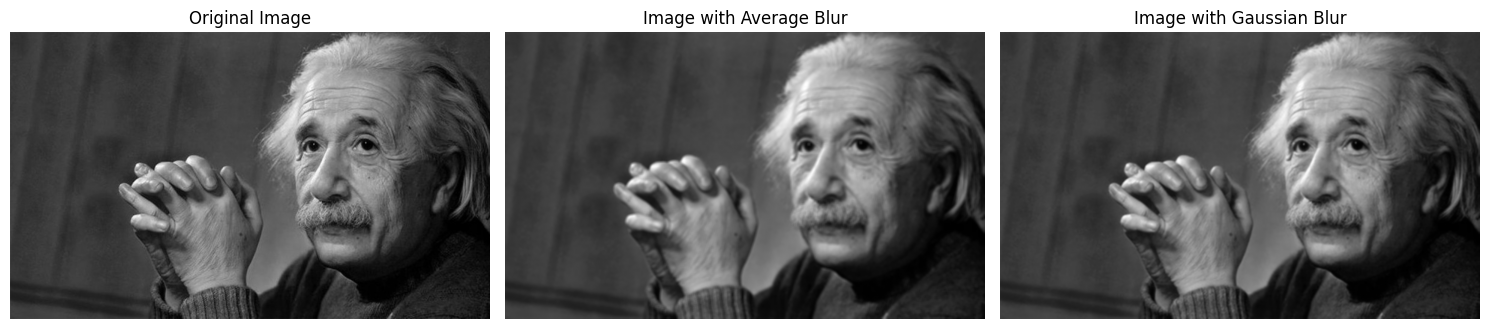

True

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (make sure the image file is named 'Azadi.jpeg')
image = cv2.imread('./Azadi.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Average (Mean) filter to blur the image
average_blurred_image = cv2.blur(image, (5, 5))  # Kernel size 5x5

# Apply Gaussian filter to blur the image
gaussian_blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size 5x5 and standard deviation 0

# Display the results
plt.figure(figsize=(15, 10))

# Show the original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Show the average blurred image
plt.subplot(1, 3, 2)
plt.imshow(average_blurred_image, cmap='gray')
plt.title('Image with Average Blur')
plt.axis('off')

# Show the Gaussian blurred image
plt.subplot(1, 3, 3)
plt.imshow(gaussian_blurred_image, cmap='gray')
plt.title('Image with Gaussian Blur')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the blurred images
cv2.imwrite('./average_blurred_image(d).png', average_blurred_image)
cv2.imwrite('./gaussian_blurred_image(d).png', gaussian_blurred_image)


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection E<br>
    </font>
</div>


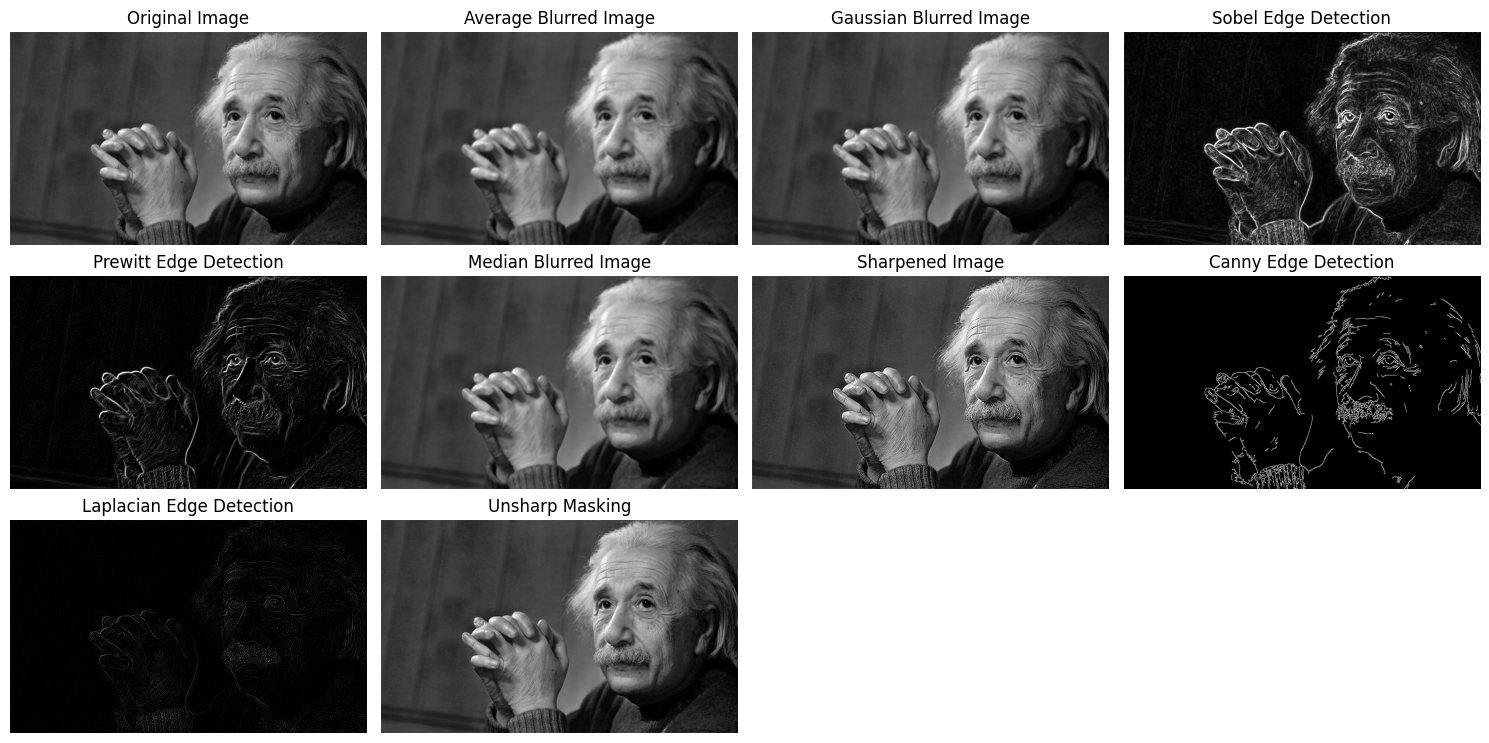

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('./Azadi.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Average Filter
average_blurred_image = cv2.blur(image, (5, 5))  # Kernel size 5x5

# Apply Gaussian Filter
gaussian_blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size 5x5 and std deviation 0

# Apply Sobel Filter for Edge Detection (Horizontal and Vertical edges)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)
sobel_edges = np.uint8(np.clip(sobel_edges, 0, 255))

# Apply Prewitt Filter for Edge Detection
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

prewitt_x = cv2.filter2D(image, -1, prewitt_kernel_x).astype(np.float64)
prewitt_y = cv2.filter2D(image, -1, prewitt_kernel_y).astype(np.float64)

# Now calculate the magnitude (edge strength) of Prewitt filter results
prewitt_edges = cv2.magnitude(prewitt_x, prewitt_y)
prewitt_edges = np.uint8(np.clip(prewitt_edges, 0, 255))

# Apply Median Filter
median_blurred_image = cv2.medianBlur(image, 5)  # Kernel size 5

# Apply Sharpening Filter
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

# Apply Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)  # Lower and upper thresholds for Canny

# Apply Laplacian Filter
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)
laplacian_edges = np.uint8(np.clip(laplacian_edges, 0, 255))

# Apply Unsharp Masking
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)
unsharp_image = cv2.addWeighted(image, 1.5, gaussian_blurred, -0.5, 0)

# Save the images in separate folders
cv2.imwrite('./output/average_blurred_image.png', average_blurred_image)
cv2.imwrite('./output/gaussian_blurred_image.png', gaussian_blurred_image)
cv2.imwrite('./output/sobel_edges.png', sobel_edges)
cv2.imwrite('./output/prewitt_edges.png', prewitt_edges)
cv2.imwrite('./output/median_blurred_image.png', median_blurred_image)
cv2.imwrite('./output/sharpened_image.png', sharpened_image)
cv2.imwrite('./output/canny_edges.png', canny_edges)
cv2.imwrite('./output/laplacian_edges.png', laplacian_edges)
cv2.imwrite('./output/unsharp_image.png', unsharp_image)

# Displaying the results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(4, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Average Blurred Image
plt.subplot(4, 4, 2)
plt.imshow(average_blurred_image, cmap='gray')
plt.title('Average Blurred Image')
plt.axis('off')

# Gaussian Blurred Image
plt.subplot(4, 4, 3)
plt.imshow(gaussian_blurred_image, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')

# Sobel Edge Detection
plt.subplot(4, 4, 4)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(4, 4, 5)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

# Median Blurred Image
plt.subplot(4, 4, 6)
plt.imshow(median_blurred_image, cmap='gray')
plt.title('Median Blurred Image')
plt.axis('off')

# Sharpened Image
plt.subplot(4, 4, 7)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

# Canny Edge Detection
plt.subplot(4, 4, 8)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Laplacian Edge Detection
plt.subplot(4, 4, 9)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

# Unsharp Image
plt.subplot(4, 4, 10)
plt.imshow(unsharp_image, cmap='gray')
plt.title('Unsharp Masking')
plt.axis('off')

plt.tight_layout()
plt.show()


Explanation for Question 1: Performance Comparison of Convolution Methods
Summary:
In this section, we aimed to compare the performance of different 2D convolution methods (Four loops, Two loops, and im2col) by measuring the time each method takes to complete the convolution operation. Specifically, we wanted to identify which method is the fastest and which is the slowest, and understand why this occurs based on the underlying algorithm used by each method.

Steps Taken:
Timing the Execution: We measured the average time taken by each method over 100 iterations. This was done to ensure consistency and to minimize the impact of occasional delays (such as system interruptions).

Methods Compared:

Four loops: A traditional method using four nested loops to manually perform the convolution. This method has a time complexity of O(n⋅m), where n is the size of the input image and m is the size of the kernel. This leads to slower performance for larger inputs due to the nested loops.

Two loops: A simplified method using two loops to compute the convolution, which is faster than Four loops but still has a linear complexity.

im2col: This method flattens the image patches into a matrix (im2col transformation) and then performs matrix multiplication. This technique leverages optimized matrix operations and performs the convolution efficiently, especially for larger inputs.

Results: The im2col method was found to be the fastest, taking only 0.003162020000163466 seconds on average. On the other hand, the Four loops method was the slowest, taking 0.013427649000659585 seconds.

Explanation of Results:
The Four loops method is slower due to its high time complexity O(n⋅m) and the repeated pixel-wise operations within the nested loops.

im2col performs matrix multiplication, which is highly optimized and faster, particularly for larger datasets. This method avoids the need for pixel-wise iteration, reducing computational time significantly.

Explanation for Question 2: Effect of Stride and Padding on Performance
Summary:
In this section, we investigated how changing the values of stride and pad affects the performance of each convolution method. Stride determines how far the kernel moves during convolution, and padding determines how much extra space (zeros or other values) is added around the input image to preserve the size of the output or to apply the kernel at the edges of the image.

Steps Taken:
Experimenting with stride and pad:

We systematically altered the values of stride (how much the kernel moves with each step) and pad (how much padding is added to the image) and measured how these changes affected the execution time of each convolution method.

By increasing the stride, we reduced the number of operations because fewer steps are taken during the convolution. However, this can also result in a loss of information since the kernel skips pixels.

Padding increases the size of the input, thus increasing the number of computations needed.

Observing Performance Changes:

For Four loops and Two loops, performance was highly sensitive to changes in stride and padding. Larger strides reduced the number of operations but made the method less precise. More padding increased the number of operations, leading to slower performance.

im2col, however, was less affected by these changes because the method relies on matrix operations (which handle stride and padding more efficiently).

Explanation of Results:
The traditional methods (Four loops and Two loops) are directly affected by stride and padding because these methods perform convolution by iterating over each pixel and applying the kernel to each region. Any increase in stride or padding directly increases or decreases the number of operations, leading to noticeable performance changes.

On the other hand, im2col uses matrix transformations to apply the kernel, and as a result, it is less sensitive to changes in stride and padding. The matrix multiplication used in im2col is well-optimized and can handle varying stride and padding without a significant decrease in performance.

